<a href="https://colab.research.google.com/github/aeyage/113-application-of-stack/blob/master/Mercari_Skill_Test_Software_Engineer_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mercari - `Skill Test: Software Engineer (ML)`

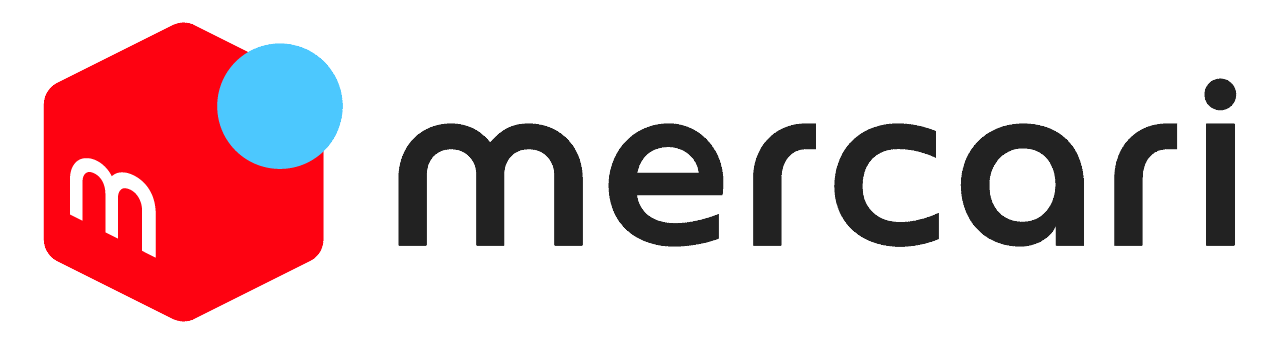

Author: [Aiman Hakimi](https://aeyage.xyz/)

Time check: **28/6/2024 @ 21:59** ---> **03/7/2024 @ 19:22**


Suggestion: Best viewed on `Google Colab`.

##**Task 2: Item Category Prediction**

###**Data Analysis/ Visualization**

In [6]:
%config Completer.use_jedi = False

import pandas as pd
pd.set_option("display.max_columns", None)

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams # store various configuration plot settings

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         700 non-null    int64  
 1   category_class  700 non-null    float64
 2   sold_price      700 non-null    int64  
 3   price           700 non-null    int64  
 4   area_name       700 non-null    object 
 5   condition       700 non-null    object 
 6   size            700 non-null    int64  
 7   listing_at      700 non-null    object 
 8   item_tag_hash   700 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 49.3+ KB
None

           item_id  category_class   sold_price        price        size
count   700.000000      700.000000   700.000000   700.000000  700.000000
mean   5529.531429        1.498571  1092.124286  1118.312857    9.407143
std    2590.820764        1.359015   201.949030   298.301200    7.804199
min    1041.000000        0.000000   646

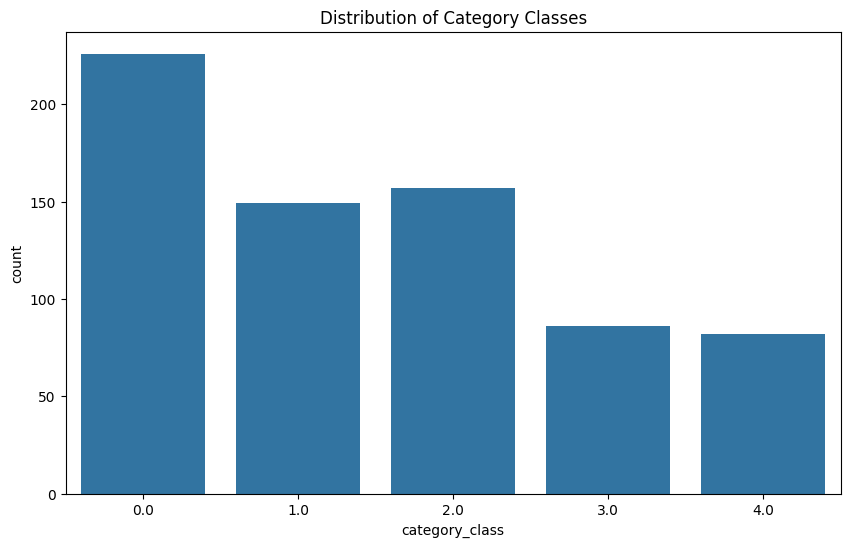

In [7]:
# load the dataset
train_df = pd.read_csv('train.csv')

# display basic information and statistics
print(train_df.info())
print(f'')
print(train_df.describe())

# visualize the distribution of category_class
print(f'')
plt.figure(figsize=(10, 6))
sns.countplot(x='category_class', data=train_df)
plt.title('Distribution of Category Classes')
plt.show()

###**Feature Extraction/ Feature Engineering**

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# handle missing values if any
train_df = train_df.dropna()

# load the test dataset
test_df = pd.read_csv('test.csv')

# combine train and test data for consistent encoding
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# encode categorical features
label_encoder_area = LabelEncoder()
combined_df['area_name'] = label_encoder_area.fit_transform(combined_df['area_name'])

label_encoder_condition = LabelEncoder()
combined_df['condition'] = label_encoder_condition.fit_transform(combined_df['condition'])

combined_df['listing_at'] = pd.to_datetime(combined_df['listing_at']).astype(int) / 10**9  # convert datetime to timestamp

# one-hot encode 'item_tag_hash'
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
tag_hash_encoded = onehot_encoder.fit_transform(combined_df[['item_tag_hash']])

# add the one-hot encoded features back to the dataframe
tag_hash_encoded_df = pd.DataFrame(tag_hash_encoded, columns=onehot_encoder.get_feature_names_out(['item_tag_hash']))
combined_df = pd.concat([combined_df, tag_hash_encoded_df], axis=1)
combined_df = combined_df.drop(['item_tag_hash'], axis=1)

# split back into train and test data
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]

# define features and target variable for training data
X = train_df.drop(['item_id', 'category_class'], axis=1)
y = train_df['category_class']

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

###**Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

###**Model Evaluation**

In [ ]:
from sklearn.metrics import f1_score, classification_report

# make predictions on the validation set
y_pred = model.predict(X_val)

# evaluate the model
score = f1_score(y_val, y_pred, average='macro')
print('Mean F1-Score:', score)
print(classification_report(y_val, y_pred))

Mean F1-Score: 0.781016124483295
              precision    recall  f1-score   support

         0.0       0.66      0.85      0.74        34
         1.0       0.79      0.86      0.82        35
         2.0       0.81      0.64      0.71        39
         3.0       0.92      0.65      0.76        17
         4.0       0.87      0.87      0.87        15

    accuracy                           0.77       140
   macro avg       0.81      0.77      0.78       140
weighted avg       0.79      0.77      0.77       140



###**Label Prediction**

In [ ]:
# prepare the test data
test_X = test_df.drop(['item_id'], axis=1)

# make predictions
test_df['category_class'] = model.predict(test_X)

# prepare the submission file
submission = test_df[['item_id', 'category_class']]
submission.to_csv('submission.csv', index=False)